In [107]:
#4.1
import pandas as pd

# 加载 CSV 文件
file_path = 'Bet_2021.csv'
df = pd.read_csv(file_path)

# 查看数据的前几行以了解其结构
print("原始数据：")
print(df.head())

# 检查缺失值的数量
print("\n每列中的缺失值数量：")
print(df.isnull().sum())

# 删除包含缺失值的行
df_cleaned = df.dropna()

# 确保数据中没有无效值（如质量差的数据或非数值字符） ### Note: 像'Time'和'Site'这些非数值字符也删掉了耶？所以下面全删掉了。
for column in df_cleaned.select_dtypes(include=['object']):
    df_cleaned[column] = pd.to_numeric(df_cleaned[column], errors='coerce')

# 删除因为转换为数值而引入 NaN 的行
df_cleaned = df_cleaned.dropna()

# 检查清理后的数据
print("\n清理后的数据：")
print(df_cleaned.head()) ### Note: 全部变成空的了啊喂）

# 保存清理后的数据到新的 CSV 文件
output_path = 'Bet_2021_cleaned.csv'
df_cleaned.to_csv(output_path, index=False)

print(f"\n清理后的数据已保存至 {output_path}")

原始数据：
            Time   Site   WS   WD     T  RH       P  Precip
0  2020/1/1 0:00  G3674  3.1   91  15.9  92  1008.1     0.0
1  2020/1/1 1:00  G3674  2.9  108  15.7  91  1008.1     0.0
2  2020/1/1 2:00  G3674  2.8  106  15.5  92  1007.8     0.0
3  2020/1/1 3:00  G3674  3.9   98  15.3  92  1007.5     0.0
4  2020/1/1 4:00  G3674  4.6   79  15.2  91  1007.4     0.0

每列中的缺失值数量：
Time      0
Site      0
WS        0
WD        0
T         0
RH        0
P         0
Precip    0
dtype: int64

清理后的数据：
Empty DataFrame
Columns: [Time, Site, WS, WD, T, RH, P, Precip]
Index: []

清理后的数据已保存至 Bet_2021_cleaned.csv


object
datetime64[ns]


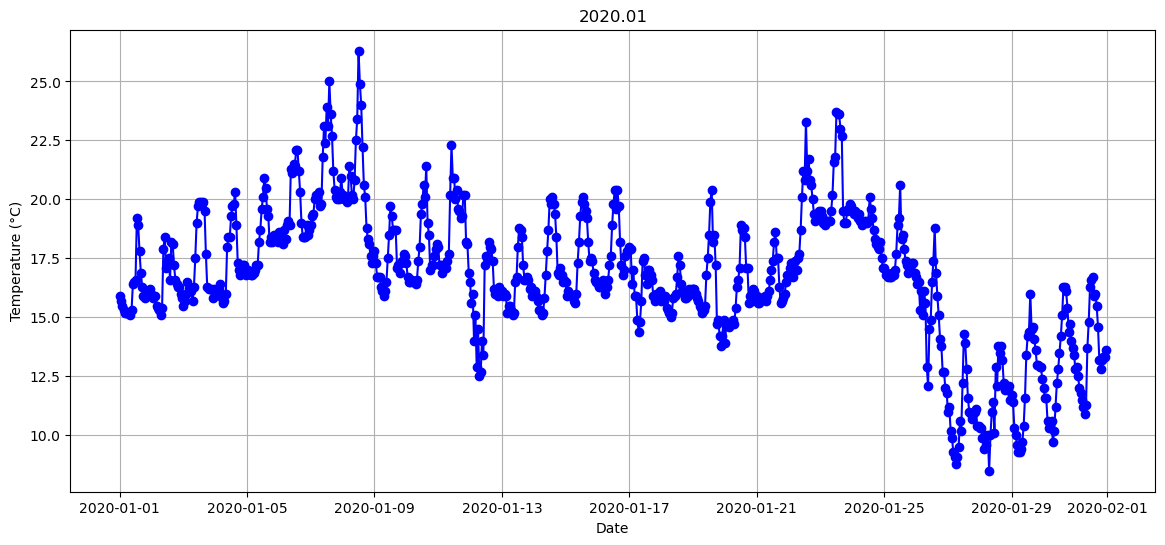

In [106]:
# 4.2
# 读取数据集
data = pd.read_csv('Bet_2021.csv')

# 检查'Time'列的数据类型
print(data['Time'].dtype)

# 如果'Time'列不是日期时间类型，则将其转换为日期时间类型
data['Time'] = pd.to_datetime(data['Time'])

# 再次检查'Time'列的数据类型
print(data['Time'].dtype)

# 提取2020年一月的数据
jan_2020_data = data[(data['Time'].dt.year == 2020) & (data['Time'].dt.month == 1)]

# 绘制温度变化曲线图
plt.figure(figsize=(14, 6))
plt.plot(jan_2020_data['Time'], jan_2020_data['T'], color='blue', marker='o')
plt.title("2020.01")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.show()

In [105]:
# 4.3
import numpy as np
# 读取数据集
filepath = 'Bet_2021.csv'
data = pd.read_csv(filepath)

# 显示数据集的前几行以了解其结构
data.head()
# 描述性统计
desc_stats = data.describe()

# 缺失值检查
missing_values = data.isnull().sum()

# 唯一值检查
unique_values = data.nunique()

# 数据类型检查
data_types = data.dtypes

# 数值列的范围检查
numeric_columns = data.select_dtypes(include=[np.number])
range_check = numeric_columns.apply(lambda x: x.max() - x.min())

desc_stats, missing_values, unique_values, data_types, range_check

(                WS           WD            T           RH            P  \
 count  8768.000000  8768.000000  8768.000000  8768.000000  8768.000000   
 mean      2.516298   161.961109    22.288378    84.108919   550.572776   
 std      24.021541   106.688013    19.544207    24.397022   829.587544   
 min    -999.000000  -999.000000  -999.000000  -999.000000  -999.000000   
 25%       1.500000    79.000000    18.600000    77.000000   986.600000   
 50%       2.400000   124.000000    23.300000    87.000000   991.600000   
 75%       4.100000   257.000000    26.900000    96.000000   997.400000   
 max      15.200000   360.000000    35.500000   100.000000  1010.600000   
 
             Precip  
 count  8768.000000  
 mean      0.192781  
 std       1.562305  
 min       0.000000  
 25%       0.000000  
 50%       0.000000  
 75%       0.000000  
 max      42.800000  ,
 Time      0
 Site      0
 WS        0
 WD        0
 T         0
 RH        0
 P         0
 Precip    0
 dtype: int64,
 Time